In [1]:
pip install tensorflow numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing libraries
import numpy as np
%matplotlib inline

import tensorflow as tf
import streamlit as slt
import os
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [4]:
#fetch images
count = 0
dirs= os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print(dir + 'Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print('Total images Folder has '+ str(count) + ' Images')

daisyFolder has 764 Images
dandelionFolder has 1052 Images
roseFolder has 784 Images
sunflowerFolder has 733 Images
tulipFolder has 984 Images
Total images Folder has 4317 Images


In [34]:
# load images into arrays and dataset
base_dir = 'Images/'
img_size = 180
batch = 32

train_ds = tf.keras.utils.image_dataset_from_directory(base_dir, 
                                                       seed=123, 
                                                       validation_split=0.2,
                                                       subset='training',
                                                      
                                                       image_size=(img_size, img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir, 
                                                       seed=123, 
                                                       validation_split=0.2,
                                                       subset='validation',
                                                        batch_size= batch,
                                                       image_size=(img_size, img_size))

                                                                                                                              

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [35]:
import matplotlib.pyplot as plt


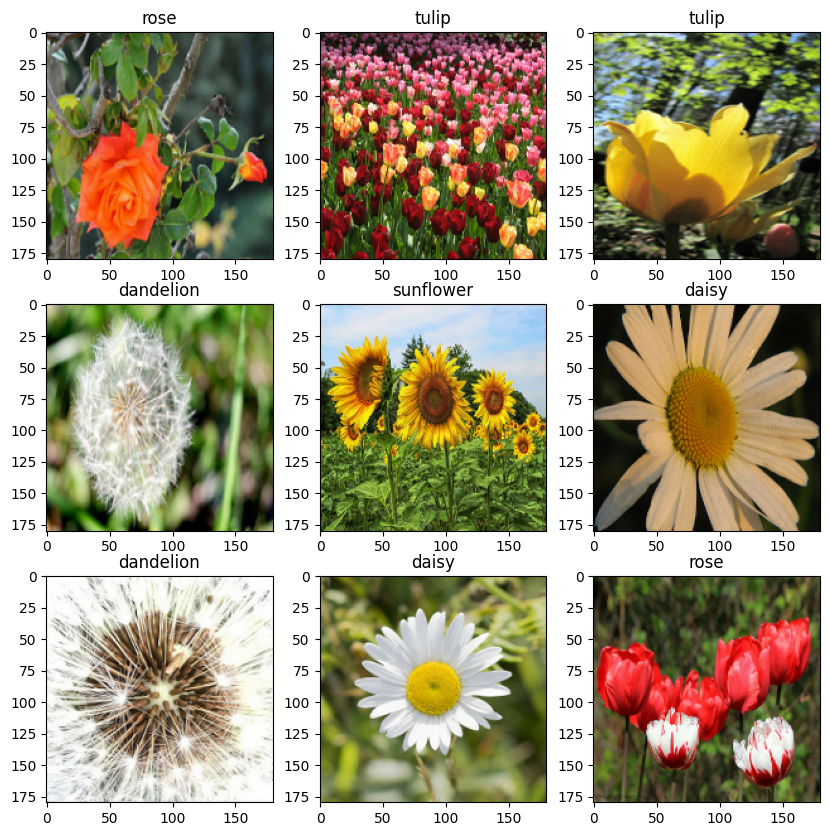

In [36]:
i=0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('on')
plt.show()

In [37]:
for images, labels in train_ds.take(1):
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)


Images shape: (32, 180, 180, 3)
Labels shape: (32,)


In [38]:
print("Labels:", labels.numpy())
print("Flower Names:", flower_names)


Labels: [0 1 2 3 1 1 1 1 0 3 4 0 3 2 1 4 1 2 0 1 1 4 2 4 4 3 3 0 4 4 4 3]
Flower Names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [39]:
print(images[i].shape)


(180, 180, 3)


In [40]:
plt.show()


In [42]:
#cache memory
AUTOTUNE = tf.data.AUTOTUNE

In [43]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [44]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [50]:
#Data augumentation(it takes one image and make in zoom in randit and make one images to many image)
data_augumentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (180,180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


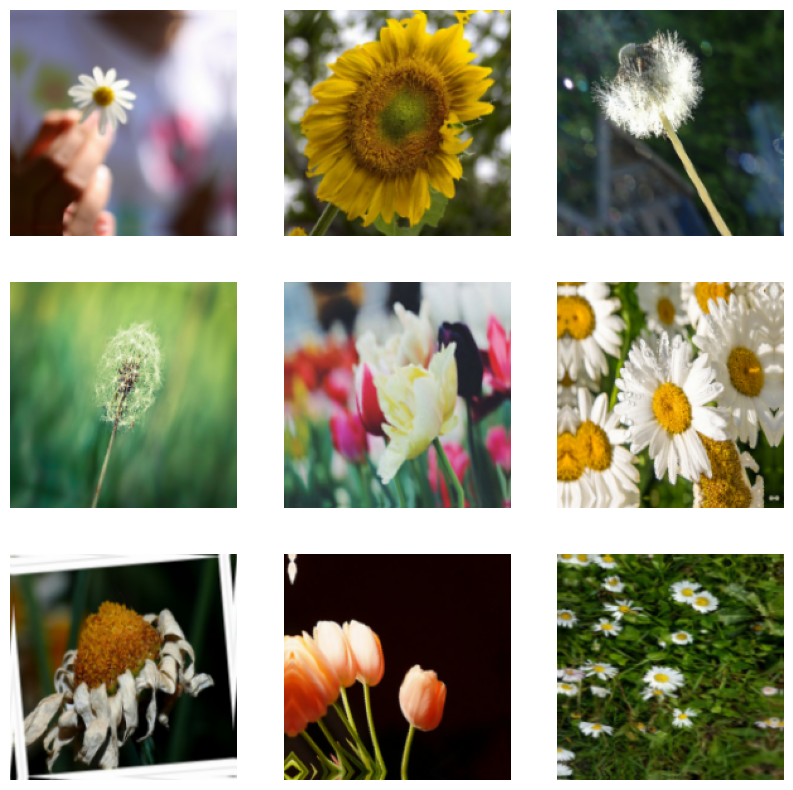

In [51]:
i=0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        single_image = images[i]
        single_image = tf.expand_dims(single_image, axis=0)  # Add batch dimension
        
        # Apply data augmentation
        augmented_image = data_augumentation(single_image)  #
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype('uint8'))  
        plt.axis('off')
plt.show()

In [48]:
for images, labels in train_ds.take(1):
    print(images.shape)


(32, 180, 180, 3)


In [54]:
#model creation

model = Sequential([
    data_augumentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3,padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3,padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2), #overide of data
    Flatten(),
    Dense(128 ,activation='relu'),
    Dense(5)
])

In [55]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [56]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(train_ds, epochs = 15, validation_data=val_ds)

Epoch 1/15


108/108 ━━━━━━━━━━━━━━━━━━━━ 40s 372ms/step - accuracy: 0.6941 - loss: 0.8013 - val_accuracy: 0.6744 - val_loss: 0.8480
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 43s 398ms/step - accuracy: 0.7155 - loss: 0.7702 - val_accuracy: 0.6883 - val_loss: 0.8091
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 40s 371ms/step - accuracy: 0.7385 - loss: 0.7045 - val_accuracy: 0.6895 - val_loss: 0.8431
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 40s 372ms/step - accuracy: 0.7552 - loss: 0.6550 - val_accuracy: 0.6825 - val_loss: 0.7986
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 357ms/step - accuracy: 0.7503 - loss: 0.6189 - val_accuracy: 0.6964 - val_loss: 0.7788
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 36s 331ms/step - accuracy: 0.7662 - loss: 0.6051 - val_accuracy: 0.7231 - val_loss: 0.7458
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 347ms/step - accuracy: 0.7831 - loss: 0.5773 - val_accuracy: 0.7462 - val_loss: 0.7220
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 345ms/step - accuracy: 0.8006 - loss: 0.5294 - val

In [64]:
input_image = tf.keras.utils.load_img(r"N:\AI Projects\AI_Projects_LLM\Images\rosedemo.jpg",target_size=(180,180))
input_image_array = tf.keras.utils.img_to_array(input_image)
input_image_exp_dim = tf.expand_dims(input_image_array, 0)

prediction = model.predict(input_image_exp_dim)                       

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [67]:

result = tf.nn.softmax(prediction[0])
print(result)

tf.Tensor([2.1459250e-04 5.5120219e-09 9.7671026e-01 3.0460860e-11 2.3075195e-02], shape=(5,), dtype=float32)


In [69]:
flower_names[np.argmax(result)]

'rose'

In [77]:
#creating function
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path,target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    prediction = model.predict(input_image_exp_dim) 
    
    result = tf.nn.softmax(prediction[0])
    outcome  = 'The Image belongs to  ' + flower_names[np.argmax(result )] + ' with a score of ' + str(np.max(result)*100)
    return outcome
    

In [78]:
classify_images('N:\AI Projects\AI_Projects_LLM\Images\ddem.webp')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


'The Image belongs to  daisy with a score of 99.80023503303528'

In [80]:
model.save('Image_Recognisation_Model.h5')